# Neural Network Lab
### Christian Basso
In this lab you will be experimenting with ANNs.  Let's start by importing a few things.  

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-01-30 19:39:43.791936: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


We first generate some dummy data from random samples in a 2D space from 4 clusters.


In [2]:
n_samples = 64
variance = 0.01
  
# 4 clusters in a 2D space
centers = np.array([[0, 0],
                    [0, 1],
                    [1, 0],
                    [1, 1]])
   
X, y = make_blobs(n_samples,
                  centers=centers,
                  cluster_std = np.sqrt(variance),
                  shuffle=True)

Let's use matplot lib to plot the clusters of the ``X`` values coloring the points according to their labels (``y``)

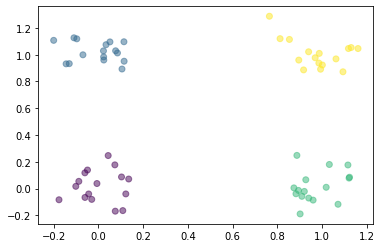

In [3]:
plt.scatter(X[:,0],X[:,1], c=y, alpha=0.5)
plt.show()

## Exercise 1
We will be classifying our data, so you should fill out the next two functions in the next cell to accurately classify the values.  You should not use any loops!  

You should be able to achieve 100% accuracy with the provided blobs, so you should test your function by creating a second set of values with a higher variance so that your classifier is not able to achieve 100% accuracy.  Document this appropriately in the following cell(s).

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression


def my_classifier(X):
    ''' This function takes a NumPy vector with 2 variables and returns a classification value (0-3)
    '''
#    print(x)
#    if x[0] < 0.4:
#        if x[1] > .6:
#            return 1
#        if x[1] <.6:
#            return 0
#    if x[0] > 0.21:
#        if x[1] > .6:
#            return 2
#        if x[1] < 6:
#            return 3

    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    return X

def run_my_classifier(X, y):
    ''' This function takes a vector of pairs of points, classifies each pair using my_classifier, and 
    then compares the predicted y value with the actual y values in the y variable.  It should return the 
    accuracy value for the two vectors.  
    '''
    model = LogisticRegression()
    model.fit(X, y)
    Xnew = my_classifier(X)
    ynew = model.predict(Xnew)
    acc = accuracy_score(y, ynew)
    return acc

In [5]:
run_my_classifier(X,y)

1.0

In [23]:
n_samples = 64
variance = 0.5
  
# 4 clusters in a 2D space
centers = np.array([[0, 0],
                    [0, 1],
                    [1, 0],
                    [1, 1]])
   
HVX, HVy = make_blobs(n_samples,
                  centers=centers,
                  cluster_std = np.sqrt(variance),
                  shuffle=True)


In [24]:
run_my_classifier(HVX, HVy)

0.453125

## Multi-Layer Perceptron

We now define a function to create and train a Multi-layer Perceptron (MLP) classifier.   Calling this function will train the model and generate some print statements that show the confusion matrix output.  

In [8]:
def run_mlp(X_train, y_train, X_test, y_test, out_class=4, hidden=16, epochs=100):
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(hidden, activation='relu'))
    model.add(Dense(out_class, activation='softmax'))
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])
    history = model.fit(x=X_train,y=y_train,epochs=epochs,verbose=1)
    model.summary()
    predicted_probabilities = model.predict(X_train)
    predicted_classes = np.argmax(predicted_probabilities, axis=1)
    acc = 100. * accuracy_score(y_train, predicted_classes)
    print("Accuracy on train set: {:.2f}%".format(acc))
    predicted_probabilities = model.predict(X_test)
    predicted_classes = np.argmax(predicted_probabilities, axis=1)
    acc = 100. * accuracy_score(y_test, predicted_classes)
    print("Accuracy on test set: {:.2f}%".format(acc))
    print(confusion_matrix(y_test, predicted_classes))

Next, lets see how well the original (low variance) data can be clustered with the MLP.  First, we need to make sure we split the data into training and testing sets to identify overfitting.  

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
run_mlp(X_train, y_train, X_test, y_test, 4, 16, 10) 

2023-01-30 19:40:19.483932: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-30 19:40:22.700480: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13665 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:da:00.0, compute capability: 7.5


Epoch 1/10
2/2 [==============================] - 4s 5ms/step - loss: 1.4351 - accuracy: 0.3542
Epoch 2/10
2/2 [==============================] - 0s 3ms/step - loss: 1.4271 - accuracy: 0.3542
Epoch 3/10
2/2 [==============================] - 0s 3ms/step - loss: 1.4190 - accuracy: 0.3542
Epoch 4/10
2/2 [==============================] - 0s 2ms/step - loss: 1.4103 - accuracy: 0.3542
Epoch 5/10
2/2 [==============================] - 0s 3ms/step - loss: 1.4025 - accuracy: 0.3542
Epoch 6/10
2/2 [==============================] - 0s 3ms/step - loss: 1.3942 - accuracy: 0.3542
Epoch 7/10
2/2 [==============================] - 0s 3ms/step - loss: 1.3869 - accuracy: 0.3542
Epoch 8/10
2/2 [==============================] - 0s 2ms/step - loss: 1.3800 - accuracy: 0.3542
Epoch 9/10
2/2 [==============================] - 0s 3ms/step - loss: 1.3727 - accuracy: 0.3542
Epoch 10/10
2/2 [==============================] - 0s 3ms/step - loss: 1.3658 - accuracy: 0.3542
Model: "sequential"
___________________

## Exercise 2:
Re-run the experiment at least 5 more times with different numbers of epochs in the next cell and plot the results to show the overall accuracy vs. the number of epochs.  Write a few sentences about what you observed about the relationship in the Reflection cell.  

In [10]:
run_mlp(X_train, y_train, X_test, y_test, 4, 16, 1) 

2/2 [==============================] - 0s 4ms/step - loss: 1.4152 - accuracy: 0.2500
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2)                 0         
                                                                 
 dense_2 (Dense)             (None, 16)                48        
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                                 
Total params: 116
Trainable params: 116
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 2ms/step
Accuracy on train set: 25.00%
1/1 [==============================] - 0s 15ms/step
Accuracy on test set: 37.50%
[[4 2 0 1]
 [1 0 0 1]
 [1 2 0 0]
 [1 1 0 2]]


In [11]:
run_mlp(X_train, y_train, X_test, y_test, 4, 16, 15) 

Epoch 1/15
2/2 [==============================] - 0s 4ms/step - loss: 1.7531 - accuracy: 0.0833
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 1.7372 - accuracy: 0.0833
Epoch 3/15
2/2 [==============================] - 0s 2ms/step - loss: 1.7220 - accuracy: 0.0833
Epoch 4/15
2/2 [==============================] - 0s 3ms/step - loss: 1.7083 - accuracy: 0.0833
Epoch 5/15
2/2 [==============================] - 0s 3ms/step - loss: 1.6950 - accuracy: 0.0833
Epoch 6/15
2/2 [==============================] - 0s 3ms/step - loss: 1.6820 - accuracy: 0.0833
Epoch 7/15
2/2 [==============================] - 0s 7ms/step - loss: 1.6687 - accuracy: 0.0625
Epoch 8/15
2/2 [==============================] - 0s 3ms/step - loss: 1.6577 - accuracy: 0.0625
Epoch 9/15
2/2 [==============================] - 0s 3ms/step - loss: 1.6452 - accuracy: 0.0625
Epoch 10/15
2/2 [==============================] - 0s 3ms/step - loss: 1.6334 - accuracy: 0.0625
Epoch 11/15
2/2 [======================

In [12]:
run_mlp(X_train, y_train, X_test, y_test, 4, 16, 30) 

Epoch 1/30
2/2 [==============================] - 0s 4ms/step - loss: 1.8305 - accuracy: 0.0833
Epoch 2/30
2/2 [==============================] - 0s 2ms/step - loss: 1.8097 - accuracy: 0.0833
Epoch 3/30
2/2 [==============================] - 0s 4ms/step - loss: 1.7895 - accuracy: 0.1042
Epoch 4/30
2/2 [==============================] - 0s 3ms/step - loss: 1.7701 - accuracy: 0.1042
Epoch 5/30
2/2 [==============================] - 0s 3ms/step - loss: 1.7514 - accuracy: 0.1250
Epoch 6/30
2/2 [==============================] - 0s 3ms/step - loss: 1.7328 - accuracy: 0.1250
Epoch 7/30
2/2 [==============================] - 0s 3ms/step - loss: 1.7135 - accuracy: 0.1250
Epoch 8/30
2/2 [==============================] - 0s 3ms/step - loss: 1.6946 - accuracy: 0.1667
Epoch 9/30
2/2 [==============================] - 0s 3ms/step - loss: 1.6775 - accuracy: 0.1667
Epoch 10/30
2/2 [==============================] - 0s 3ms/step - loss: 1.6623 - accuracy: 0.1667
Epoch 11/30
2/2 [======================

In [13]:
run_mlp(X_train, y_train, X_test, y_test, 4, 16, 75) 

Epoch 1/75
2/2 [==============================] - 0s 4ms/step - loss: 1.5017 - accuracy: 0.3750
Epoch 2/75
2/2 [==============================] - 0s 2ms/step - loss: 1.4929 - accuracy: 0.3750
Epoch 3/75
2/2 [==============================] - 0s 2ms/step - loss: 1.4820 - accuracy: 0.3750
Epoch 4/75
2/2 [==============================] - 0s 3ms/step - loss: 1.4737 - accuracy: 0.3750
Epoch 5/75
2/2 [==============================] - 0s 3ms/step - loss: 1.4649 - accuracy: 0.3750
Epoch 6/75
2/2 [==============================] - 0s 3ms/step - loss: 1.4567 - accuracy: 0.3750
Epoch 7/75
2/2 [==============================] - 0s 3ms/step - loss: 1.4490 - accuracy: 0.3750
Epoch 8/75
2/2 [==============================] - 0s 3ms/step - loss: 1.4401 - accuracy: 0.3750
Epoch 9/75
2/2 [==============================] - 0s 3ms/step - loss: 1.4324 - accuracy: 0.3750
Epoch 10/75
2/2 [==============================] - 0s 3ms/step - loss: 1.4255 - accuracy: 0.3958
Epoch 11/75
2/2 [======================

2/2 [==============================] - 0s 2ms/step
Accuracy on train set: 54.17%
1/1 [==============================] - 0s 15ms/step
Accuracy on test set: 56.25%
[[4 0 3 0]
 [0 1 0 1]
 [2 0 1 0]
 [0 0 1 3]]


In [14]:
run_mlp(X_train, y_train, X_test, y_test, 4, 16, 150) 

Epoch 1/150
2/2 [==============================] - 0s 6ms/step - loss: 1.4329 - accuracy: 0.2292
Epoch 2/150
2/2 [==============================] - 0s 3ms/step - loss: 1.4279 - accuracy: 0.2292
Epoch 3/150
2/2 [==============================] - 0s 3ms/step - loss: 1.4232 - accuracy: 0.2292
Epoch 4/150
2/2 [==============================] - 0s 3ms/step - loss: 1.4189 - accuracy: 0.2500
Epoch 5/150
2/2 [==============================] - 0s 3ms/step - loss: 1.4143 - accuracy: 0.2500
Epoch 6/150
2/2 [==============================] - 0s 4ms/step - loss: 1.4099 - accuracy: 0.2500
Epoch 7/150
2/2 [==============================] - 0s 3ms/step - loss: 1.4053 - accuracy: 0.2708
Epoch 8/150
2/2 [==============================] - 0s 3ms/step - loss: 1.4014 - accuracy: 0.2708
Epoch 9/150
2/2 [==============================] - 0s 3ms/step - loss: 1.3973 - accuracy: 0.2917
Epoch 10/150
2/2 [==============================] - 0s 3ms/step - loss: 1.3934 - accuracy: 0.3333
Epoch 11/150
2/2 [===========

1/1 [==============================] - 0s 15ms/step
Accuracy on test set: 37.50%
[[0 4 3 0]
 [0 1 1 0]
 [0 1 2 0]
 [0 0 1 3]]


<function matplotlib.pyplot.show(close=None, block=None)>

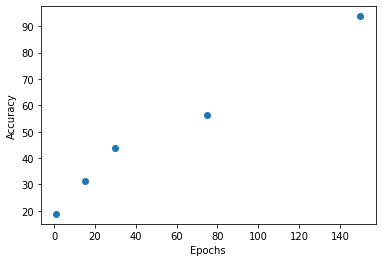

In [15]:
ac = [18.8, 31.2, 43.8, 56.3, 93.8]
ep = [1, 15, 30, 75, 150]

plt.scatter(ep, ac)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show

### Reflection
After running the mlp model with varying epochs, one can say that accuracy has a mostly linear relationship to number of epochs when testing mlp models. Also, one can see that overfitting reduced as more epochs were set.

## Exercise 3:
Experiment in the next cell by trying different numbers of neurons in the hidden layer.  Identify the smallest number of hidden neurons you could use and still achieve high accuracy.  Create a table in markdown in the reflection section to show your experimental results.  Make sure your table adequately documents your experimental variables (hyperparameters, dataset) to enable reproducability.  Write a few statements in your reflection about the results.  

In [16]:
run_mlp(X_train, y_train, X_test, y_test, 4, 10, 150) 

Epoch 1/150
2/2 [==============================] - 0s 4ms/step - loss: 1.3329 - accuracy: 0.3750
Epoch 2/150
2/2 [==============================] - 0s 3ms/step - loss: 1.3296 - accuracy: 0.3542
Epoch 3/150
2/2 [==============================] - 0s 2ms/step - loss: 1.3268 - accuracy: 0.3542
Epoch 4/150
2/2 [==============================] - 0s 4ms/step - loss: 1.3232 - accuracy: 0.3750
Epoch 5/150
2/2 [==============================] - 0s 3ms/step - loss: 1.3201 - accuracy: 0.3750
Epoch 6/150
2/2 [==============================] - 0s 3ms/step - loss: 1.3168 - accuracy: 0.3750
Epoch 7/150
2/2 [==============================] - 0s 4ms/step - loss: 1.3142 - accuracy: 0.3750
Epoch 8/150
2/2 [==============================] - 0s 3ms/step - loss: 1.3097 - accuracy: 0.3958
Epoch 9/150
2/2 [==============================] - 0s 2ms/step - loss: 1.3066 - accuracy: 0.3958
Epoch 10/150
2/2 [==============================] - 0s 3ms/step - loss: 1.3031 - accuracy: 0.3958
Epoch 11/150
2/2 [===========

In [17]:
run_mlp(X_train, y_train, X_test, y_test, 4, 5, 150) 

Epoch 1/150
2/2 [==============================] - 0s 6ms/step - loss: 1.7398 - accuracy: 0.2500
Epoch 2/150
2/2 [==============================] - 0s 3ms/step - loss: 1.7290 - accuracy: 0.2500
Epoch 3/150
2/2 [==============================] - 0s 3ms/step - loss: 1.7176 - accuracy: 0.2500
Epoch 4/150
2/2 [==============================] - 0s 3ms/step - loss: 1.7074 - accuracy: 0.2708
Epoch 5/150
2/2 [==============================] - 0s 3ms/step - loss: 1.6980 - accuracy: 0.2708
Epoch 6/150
2/2 [==============================] - 0s 3ms/step - loss: 1.6872 - accuracy: 0.2708
Epoch 7/150
2/2 [==============================] - 0s 3ms/step - loss: 1.6782 - accuracy: 0.2708
Epoch 8/150
2/2 [==============================] - 0s 3ms/step - loss: 1.6699 - accuracy: 0.2708
Epoch 9/150
2/2 [==============================] - 0s 3ms/step - loss: 1.6614 - accuracy: 0.2708
Epoch 10/150
2/2 [==============================] - 0s 3ms/step - loss: 1.6531 - accuracy: 0.2708
Epoch 11/150
2/2 [===========

In [18]:
run_mlp(X_train, y_train, X_test, y_test, 4, 3, 150) 

Epoch 1/150
2/2 [==============================] - 0s 3ms/step - loss: 1.7840 - accuracy: 0.2500
Epoch 2/150
2/2 [==============================] - 0s 3ms/step - loss: 1.7698 - accuracy: 0.2500
Epoch 3/150
2/2 [==============================] - 0s 2ms/step - loss: 1.7565 - accuracy: 0.2500
Epoch 4/150
2/2 [==============================] - 0s 3ms/step - loss: 1.7428 - accuracy: 0.2500
Epoch 5/150
2/2 [==============================] - 0s 3ms/step - loss: 1.7289 - accuracy: 0.2500
Epoch 6/150
2/2 [==============================] - 0s 2ms/step - loss: 1.7162 - accuracy: 0.2500
Epoch 7/150
2/2 [==============================] - 0s 3ms/step - loss: 1.7043 - accuracy: 0.2500
Epoch 8/150
2/2 [==============================] - 0s 3ms/step - loss: 1.6937 - accuracy: 0.2500
Epoch 9/150
2/2 [==============================] - 0s 3ms/step - loss: 1.6825 - accuracy: 0.2500
Epoch 10/150
2/2 [==============================] - 0s 4ms/step - loss: 1.6706 - accuracy: 0.2500
Epoch 11/150
2/2 [===========

In [19]:
run_mlp(X_train, y_train, X_test, y_test, 4, 1, 150) 

Epoch 1/150
2/2 [==============================] - 0s 3ms/step - loss: 1.3699 - accuracy: 0.2500
Epoch 2/150
2/2 [==============================] - 0s 3ms/step - loss: 1.3695 - accuracy: 0.2917
Epoch 3/150
2/2 [==============================] - 0s 3ms/step - loss: 1.3691 - accuracy: 0.2917
Epoch 4/150
2/2 [==============================] - 0s 3ms/step - loss: 1.3687 - accuracy: 0.2917
Epoch 5/150
2/2 [==============================] - 0s 2ms/step - loss: 1.3683 - accuracy: 0.3125
Epoch 6/150
2/2 [==============================] - 0s 2ms/step - loss: 1.3680 - accuracy: 0.3125
Epoch 7/150
2/2 [==============================] - 0s 3ms/step - loss: 1.3676 - accuracy: 0.3125
Epoch 8/150
2/2 [==============================] - 0s 2ms/step - loss: 1.3672 - accuracy: 0.3125
Epoch 9/150
2/2 [==============================] - 0s 3ms/step - loss: 1.3668 - accuracy: 0.3750
Epoch 10/150
2/2 [==============================] - 0s 3ms/step - loss: 1.3664 - accuracy: 0.3125
Epoch 11/150
2/2 [===========

In [20]:
run_mlp(X_train, y_train, X_test, y_test, 4, 15, 150) 

Epoch 1/150
2/2 [==============================] - 0s 5ms/step - loss: 1.5323 - accuracy: 0.2292
Epoch 2/150
2/2 [==============================] - 0s 4ms/step - loss: 1.5279 - accuracy: 0.2292
Epoch 3/150
2/2 [==============================] - 0s 3ms/step - loss: 1.5236 - accuracy: 0.2292
Epoch 4/150
2/2 [==============================] - 0s 3ms/step - loss: 1.5190 - accuracy: 0.2292
Epoch 5/150
2/2 [==============================] - 0s 3ms/step - loss: 1.5149 - accuracy: 0.2292
Epoch 6/150
2/2 [==============================] - 0s 3ms/step - loss: 1.5103 - accuracy: 0.2292
Epoch 7/150
2/2 [==============================] - 0s 3ms/step - loss: 1.5057 - accuracy: 0.2292
Epoch 8/150
2/2 [==============================] - 0s 3ms/step - loss: 1.5016 - accuracy: 0.2292
Epoch 9/150
2/2 [==============================] - 0s 3ms/step - loss: 1.4981 - accuracy: 0.2292
Epoch 10/150
2/2 [==============================] - 0s 3ms/step - loss: 1.4940 - accuracy: 0.2292
Epoch 11/150
2/2 [===========

### Reflection
Below is a table comparing number of hidden laters to model accuracy. All other indipendent variables are constant and each model was tested with 150 epochs.

Number of hidden layers | Accuracy

1                       | 18.75

3                       | 62.5

5                       | 43.75

10                      | 75.00

15                      | 100.00


Looking at the table above, 15 hidden layers yeilded the best accuracy. As the number of hidden layers is decreased, accuracy generally decreases. Thus, a model with 15 hidden layers can still achive a high accuracy.


## Exercise 4:
The low-variance blob data was easy to separate with simple classification rules.  Run a few experiments with the higher variance dataset you created and determine if the MLP or your deterministic solution could achieve better accuracy.  Describe your experiments in a table in the reflection section and write a few statements about your observations.  


In [25]:
X_train, X_test, y_train, y_test = train_test_split(HVX, HVy, random_state=10)

### Epoch tests (15 hidden layers)

In [26]:
run_mlp(X_train, y_train, X_test, y_test, 4, 15, 15)

Epoch 1/15
2/2 [==============================] - 0s 4ms/step - loss: 1.4355 - accuracy: 0.2292
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 1.4299 - accuracy: 0.2500
Epoch 3/15
2/2 [==============================] - 0s 3ms/step - loss: 1.4243 - accuracy: 0.1875
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 1.4192 - accuracy: 0.2083
Epoch 5/15
2/2 [==============================] - 0s 3ms/step - loss: 1.4140 - accuracy: 0.2292
Epoch 6/15
2/2 [==============================] - 0s 3ms/step - loss: 1.4091 - accuracy: 0.2292
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 1.4043 - accuracy: 0.2292
Epoch 8/15
2/2 [==============================] - 0s 3ms/step - loss: 1.3991 - accuracy: 0.2500
Epoch 9/15
2/2 [==============================] - 0s 3ms/step - loss: 1.3947 - accuracy: 0.2500
Epoch 10/15
2/2 [==============================] - 0s 3ms/step - loss: 1.3907 - accuracy: 0.2292
Epoch 11/15
2/2 [======================

In [27]:
run_mlp(X_train, y_train, X_test, y_test, 4, 15, 50)

Epoch 1/50
2/2 [==============================] - 0s 6ms/step - loss: 1.5023 - accuracy: 0.1875
Epoch 2/50
2/2 [==============================] - 0s 3ms/step - loss: 1.4954 - accuracy: 0.1875
Epoch 3/50
2/2 [==============================] - 0s 2ms/step - loss: 1.4904 - accuracy: 0.1875
Epoch 4/50
2/2 [==============================] - 0s 3ms/step - loss: 1.4853 - accuracy: 0.2083
Epoch 5/50
2/2 [==============================] - 0s 2ms/step - loss: 1.4803 - accuracy: 0.2083
Epoch 6/50
2/2 [==============================] - 0s 3ms/step - loss: 1.4743 - accuracy: 0.2292
Epoch 7/50
2/2 [==============================] - 0s 3ms/step - loss: 1.4692 - accuracy: 0.2500
Epoch 8/50
2/2 [==============================] - 0s 3ms/step - loss: 1.4639 - accuracy: 0.2500
Epoch 9/50
2/2 [==============================] - 0s 3ms/step - loss: 1.4593 - accuracy: 0.2708
Epoch 10/50
2/2 [==============================] - 0s 2ms/step - loss: 1.4542 - accuracy: 0.2708
Epoch 11/50
2/2 [======================

In [28]:
run_mlp(X_train, y_train, X_test, y_test, 4, 15, 150)

Epoch 1/150
2/2 [==============================] - 0s 4ms/step - loss: 1.4968 - accuracy: 0.2292
Epoch 2/150
2/2 [==============================] - 0s 2ms/step - loss: 1.4856 - accuracy: 0.2292
Epoch 3/150
2/2 [==============================] - 0s 2ms/step - loss: 1.4740 - accuracy: 0.2083
Epoch 4/150
2/2 [==============================] - 0s 3ms/step - loss: 1.4631 - accuracy: 0.2083
Epoch 5/150
2/2 [==============================] - 0s 3ms/step - loss: 1.4538 - accuracy: 0.2292
Epoch 6/150
2/2 [==============================] - 0s 3ms/step - loss: 1.4436 - accuracy: 0.2292
Epoch 7/150
2/2 [==============================] - 0s 3ms/step - loss: 1.4360 - accuracy: 0.2292
Epoch 8/150
2/2 [==============================] - 0s 3ms/step - loss: 1.4282 - accuracy: 0.2292
Epoch 9/150
2/2 [==============================] - 0s 3ms/step - loss: 1.4199 - accuracy: 0.2292
Epoch 10/150
2/2 [==============================] - 0s 3ms/step - loss: 1.4118 - accuracy: 0.2292
Epoch 11/150
2/2 [===========

In [29]:
run_mlp(X_train, y_train, X_test, y_test, 4, 15, 300)

Epoch 1/300
2/2 [==============================] - 0s 4ms/step - loss: 1.5845 - accuracy: 0.0833
Epoch 2/300
2/2 [==============================] - 0s 3ms/step - loss: 1.5759 - accuracy: 0.0833
Epoch 3/300
2/2 [==============================] - 0s 3ms/step - loss: 1.5674 - accuracy: 0.0833
Epoch 4/300
2/2 [==============================] - 0s 4ms/step - loss: 1.5586 - accuracy: 0.0833
Epoch 5/300
2/2 [==============================] - 0s 4ms/step - loss: 1.5509 - accuracy: 0.0833
Epoch 6/300
2/2 [==============================] - 0s 3ms/step - loss: 1.5432 - accuracy: 0.1042
Epoch 7/300
2/2 [==============================] - 0s 3ms/step - loss: 1.5358 - accuracy: 0.1250
Epoch 8/300
2/2 [==============================] - 0s 3ms/step - loss: 1.5285 - accuracy: 0.1250
Epoch 9/300
2/2 [==============================] - 0s 3ms/step - loss: 1.5214 - accuracy: 0.1250
Epoch 10/300
2/2 [==============================] - 0s 3ms/step - loss: 1.5146 - accuracy: 0.1042
Epoch 11/300
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 1.1671 - accuracy: 0.4792
Epoch 168/300
2/2 [==============================] - 0s 4ms/step - loss: 1.1662 - accuracy: 0.5000
Epoch 169/300
2/2 [==============================] - 0s 3ms/step - loss: 1.1653 - accuracy: 0.4792
Epoch 170/300
2/2 [==============================] - 0s 4ms/step - loss: 1.1642 - accuracy: 0.5000
Epoch 171/300
2/2 [==============================] - 0s 4ms/step - loss: 1.1634 - accuracy: 0.4792
Epoch 172/300
2/2 [==============================] - 0s 3ms/step - loss: 1.1624 - accuracy: 0.4792
Epoch 173/300
2/2 [==============================] - 0s 4ms/step - loss: 1.1616 - accuracy: 0.4792
Epoch 174/300
2/2 [==============================] - 0s 4ms/step - loss: 1.1608 - accuracy: 0.4792
Epoch 175/300
2/2 [==============================] - 0s 3ms/step - loss: 1.1599 - accuracy: 0.4792
Epoch 176/300
2/2 [==============================] - 0s 3ms/step - loss: 1.1590 - accuracy: 0.4792
Epoch 177/300
2/2 [=====

Looks like 150 epochs is the winner...

### Hidden layer tests (150 Epochs)

In [30]:
run_mlp(X_train, y_train, X_test, y_test, 4, 1, 150)

Epoch 1/150
2/2 [==============================] - 0s 4ms/step - loss: 1.3543 - accuracy: 0.4167
Epoch 2/150
2/2 [==============================] - 0s 4ms/step - loss: 1.3525 - accuracy: 0.4167
Epoch 3/150
2/2 [==============================] - 0s 3ms/step - loss: 1.3506 - accuracy: 0.4167
Epoch 4/150
2/2 [==============================] - 0s 3ms/step - loss: 1.3490 - accuracy: 0.4167
Epoch 5/150
2/2 [==============================] - 0s 3ms/step - loss: 1.3472 - accuracy: 0.4167
Epoch 6/150
2/2 [==============================] - 0s 3ms/step - loss: 1.3456 - accuracy: 0.4167
Epoch 7/150
2/2 [==============================] - 0s 3ms/step - loss: 1.3437 - accuracy: 0.4167
Epoch 8/150
2/2 [==============================] - 0s 3ms/step - loss: 1.3418 - accuracy: 0.4167
Epoch 9/150
2/2 [==============================] - 0s 3ms/step - loss: 1.3400 - accuracy: 0.4167
Epoch 10/150
2/2 [==============================] - 0s 4ms/step - loss: 1.3384 - accuracy: 0.4167
Epoch 11/150
2/2 [===========

In [31]:
run_mlp(X_train, y_train, X_test, y_test, 4, 10, 150)

Epoch 1/150
2/2 [==============================] - 0s 4ms/step - loss: 1.4220 - accuracy: 0.2292
Epoch 2/150
2/2 [==============================] - 0s 4ms/step - loss: 1.4196 - accuracy: 0.2292
Epoch 3/150
2/2 [==============================] - 0s 2ms/step - loss: 1.4174 - accuracy: 0.2292
Epoch 4/150
2/2 [==============================] - 0s 2ms/step - loss: 1.4156 - accuracy: 0.2292
Epoch 5/150
2/2 [==============================] - 0s 2ms/step - loss: 1.4133 - accuracy: 0.2292
Epoch 6/150
2/2 [==============================] - 0s 3ms/step - loss: 1.4111 - accuracy: 0.2292
Epoch 7/150
2/2 [==============================] - 0s 3ms/step - loss: 1.4092 - accuracy: 0.2292
Epoch 8/150
2/2 [==============================] - 0s 3ms/step - loss: 1.4071 - accuracy: 0.2292
Epoch 9/150
2/2 [==============================] - 0s 3ms/step - loss: 1.4052 - accuracy: 0.2292
Epoch 10/150
2/2 [==============================] - 0s 3ms/step - loss: 1.4030 - accuracy: 0.2292
Epoch 11/150
2/2 [===========

In [32]:
run_mlp(X_train, y_train, X_test, y_test, 4, 25, 150)

Epoch 1/150
2/2 [==============================] - 0s 5ms/step - loss: 1.4962 - accuracy: 0.2083
Epoch 2/150
2/2 [==============================] - 0s 3ms/step - loss: 1.4851 - accuracy: 0.2083
Epoch 3/150
2/2 [==============================] - 0s 3ms/step - loss: 1.4749 - accuracy: 0.2083
Epoch 4/150
2/2 [==============================] - 0s 3ms/step - loss: 1.4661 - accuracy: 0.2083
Epoch 5/150
2/2 [==============================] - 0s 3ms/step - loss: 1.4575 - accuracy: 0.2083
Epoch 6/150
2/2 [==============================] - 0s 4ms/step - loss: 1.4470 - accuracy: 0.2083
Epoch 7/150
2/2 [==============================] - 0s 3ms/step - loss: 1.4392 - accuracy: 0.2083
Epoch 8/150
2/2 [==============================] - 0s 3ms/step - loss: 1.4320 - accuracy: 0.2083
Epoch 9/150
2/2 [==============================] - 0s 3ms/step - loss: 1.4245 - accuracy: 0.2083
Epoch 10/150
2/2 [==============================] - 0s 3ms/step - loss: 1.4167 - accuracy: 0.2083
Epoch 11/150
2/2 [===========

In [33]:
run_mlp(X_train, y_train, X_test, y_test, 4, 50, 150)

Epoch 1/150
2/2 [==============================] - 0s 4ms/step - loss: 1.3845 - accuracy: 0.2708
Epoch 2/150
2/2 [==============================] - 0s 2ms/step - loss: 1.3810 - accuracy: 0.2708
Epoch 3/150
2/2 [==============================] - 0s 3ms/step - loss: 1.3768 - accuracy: 0.2708
Epoch 4/150
2/2 [==============================] - 0s 3ms/step - loss: 1.3731 - accuracy: 0.2708
Epoch 5/150
2/2 [==============================] - 0s 3ms/step - loss: 1.3686 - accuracy: 0.2708
Epoch 6/150
2/2 [==============================] - 0s 3ms/step - loss: 1.3643 - accuracy: 0.2917
Epoch 7/150
2/2 [==============================] - 0s 3ms/step - loss: 1.3612 - accuracy: 0.3125
Epoch 8/150
2/2 [==============================] - 0s 3ms/step - loss: 1.3574 - accuracy: 0.2917
Epoch 9/150
2/2 [==============================] - 0s 3ms/step - loss: 1.3538 - accuracy: 0.2917
Epoch 10/150
2/2 [==============================] - 0s 3ms/step - loss: 1.3504 - accuracy: 0.2917
Epoch 11/150
2/2 [===========

### Reflection

##### Epochs

Number of epochs | Accuracy

15 | 12.50

50 | 31.25

150| 56.25

300| 50.00


##### Hidden Layers

Number of HL | Accuracy

1 | 37.50

10| 50.00

15| 56.25

50| 45.75


The first set of cells tested which number of epochs yeilded the best accuracy. In contrast to the low variance set in the previous exercise, more epochs did not corelated to a higher accuracy. 150 epochs tested 6% higher than 300 epochs. Thus, we will use 150 epochs for our next set of tests since it had the most accurate predictions. The next set of cells tests the accuracy of the model with regards to number of hidden layers. After testing 1, 5, 25, abd 50 hidden layers, the top performing being 25 hidden layers. Thus, the model with the highest accuracy in regard to high variance blobs has 150 epochs and 25 hidden layers. 

Also, it is intresting to see that the number of hidden layers may lower test accuracy, but one can see that it is not due to over fitting. I would think that the training accuracy would always go up with an increase in hidden layers.

## Pistachio Dataset
The blob data experiments were interesting, but are not representative of a real-world problem.  Next, we will use data from an industrial pistachio classifier designed to identify different varities of pistachio nuts.  

https://www.kaggle.com/datasets/muratkokludataset/pistachio-image-dataset


Let's start by loading some data.  Because this is image data, we are going to use a generator to bring in the data.  This also allows us to add augmentation to the images to hopefully grow the robustness of our algorithm. 

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
            validation_split=0.2,
            rescale=1./255, # to bring the image range from 0..255 to 0..1
            rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
            zoom_range = 0, # randomly zoom image 
            width_shift_range=0,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=False,  # randomly flip images
            vertical_flip=False) # randomly flip images
train_it = datagen.flow_from_directory( '/data/cs2300/pistachio/', 
                                           target_size=(224,224), 
                                           color_mode='grayscale', 
                                           batch_size=1,
                                           class_mode="categorical",
                                           shuffle=True,
                                           subset='training')
valid_it = datagen.flow_from_directory( '/data/cs2300/pistachio/', 
                                           target_size=(224,224), 
                                           color_mode='grayscale', 
                                           shuffle=True,
                                           batch_size=1,
                                           class_mode="categorical",
                                           subset='validation')

Found 1719 images belonging to 2 classes.
Found 429 images belonging to 2 classes.


Our MLP code is expecting a NumPy array, so we need to build it.  This isn't the most elegant approach, but it gets the job done to allow our previous MLP code to work.  

In [35]:
X = []
y = []
batch_index = 0

while batch_index <= train_it.batch_index:
    #iterate through the training data and build a single array
    x_temp, y_temp = train_it.next()
    X.append(np.squeeze(x_temp[0]))
    y.append(np.squeeze(y_temp[0]))
    batch_index = batch_index + 1

X_train = np.asarray(X)
y_train = np.asarray(y)

X = []
y = []
batch_index = 0

while batch_index <= valid_it.batch_index:
    #iterate through the test data to build a single array
    x_temp, y_temp = valid_it.next()
    X.append(np.squeeze(x_temp[0]))
    y.append(np.squeeze(y_temp[0]))
    batch_index = batch_index + 1

X_test = np.asarray(X)
y_test = np.asarray(y)
X_train_reshaped = X_train.reshape(1719,50176)
X_test_reshaped = X_test.reshape(429,50176)

The following cell is a function that creates a DNN with a single hidden layer.  It includes the methods to train and evaluate the model as well.  

In [36]:
def run_binary_mlp(X_train, y_train, X_test, y_test, hidden=16, epochs=100):
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(hidden, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])
    history = model.fit(x=X_train,y=y_train,
                        validation_data = (X_test, y_test),
                        batch_size=1,epochs=epochs,
                        verbose=1)
    model.summary()
    predicted_probabilities = model.predict(X_train)
    predicted_probabilities = np.rint(predicted_probabilities)
    acc = 100. * accuracy_score(y_train, predicted_probabilities)
    print("Accuracy on train set: {:.2f}%".format(acc))
    predicted_probabilities = model.predict(X_test)
    predicted_probabilities = np.rint(predicted_probabilities)
    acc = 100. * accuracy_score(y_test, predicted_probabilities)
    print("Accuracy on test set: {:.2f}%".format(acc))
    print(confusion_matrix(y_test, predicted_probabilities))
    return history


The next cell calls the previous function and plots the results.  

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7440 - accuracy: 0.5736 - val_loss: 0.6846 - val_accuracy: 0.5734
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6836 - accuracy: 0.5736 - val_loss: 0.6827 - val_accuracy: 0.5734
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6827 - accuracy: 0.5736 - val_loss: 0.6824 - val_accuracy: 0.5734
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6825 - accuracy: 0.5736 - val_loss: 0.6823 - val_accuracy: 0.5734
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6825 - accuracy: 0.5736 - val_loss: 0.6823 - val_accuracy: 0.5734
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6825 - accuracy: 0.5736 - val_loss: 0.6823 - val_accuracy: 0.5734
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6825 - accuracy: 0.5736 - val_loss: 0.6823 - val_accuracy:

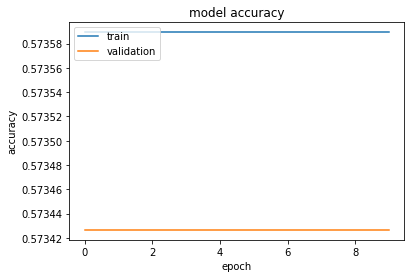

In [37]:
history = run_binary_mlp(X_train_reshaped, y_train[:,0], X_test_reshaped, y_test[:,0],30,10)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Exercise 5
In the following cell, execute at least 5 more experiments that experiment with the number of hidden neurons and number of epochs.  Create a table in the reflection and results section below that shows the configuration hyperparameters, total model parameters, test accuracy, and training accuracy.  Describe why you think the highest accuracy configuration outperformed your other experiments.  

#### Hidden Layers

In [42]:
history = run_binary_mlp(X_train_reshaped, y_train[:,0], X_test_reshaped, y_test[:,0],1,10)

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6876 - accuracy: 0.5730 - val_loss: 0.6842 - val_accuracy: 0.5734
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6833 - accuracy: 0.5736 - val_loss: 0.6825 - val_accuracy: 0.5734
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6826 - accuracy: 0.5736 - val_loss: 0.6823 - val_accuracy: 0.5734
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6826 - accuracy: 0.5736 - val_loss: 0.6823 - val_accuracy: 0.5734
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6825 - accuracy: 0.5736 - val_loss: 0.6823 - val_accuracy: 0.5734
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6825 - accuracy: 0.5736 - val_loss: 0.6823 - val_accuracy: 0.5734
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6825 - accuracy: 0.5736 - val_loss: 0.6823 - val_accuracy:

In [43]:
history = run_binary_mlp(X_train_reshaped, y_train[:,0], X_test_reshaped, y_test[:,0],10,10)

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7081 - accuracy: 0.5817 - val_loss: 0.6836 - val_accuracy: 0.5734
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6832 - accuracy: 0.5736 - val_loss: 0.6825 - val_accuracy: 0.5734
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6826 - accuracy: 0.5736 - val_loss: 0.6824 - val_accuracy: 0.5734
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6825 - accuracy: 0.5736 - val_loss: 0.6823 - val_accuracy: 0.5734
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6825 - accuracy: 0.5736 - val_loss: 0.6823 - val_accuracy: 0.5734
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6825 - accuracy: 0.5736 - val_loss: 0.6823 - val_accuracy: 0.5734
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6825 - accuracy: 0.5736 - val_loss: 0.6823 - val_accuracy:

In [45]:
history = run_binary_mlp(X_train_reshaped, y_train[:,0], X_test_reshaped, y_test[:,0],50,10)

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6959 - accuracy: 0.6574 - val_loss: 0.6831 - val_accuracy: 0.5734
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6830 - accuracy: 0.5736 - val_loss: 0.6823 - val_accuracy: 0.5734
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6826 - accuracy: 0.5736 - val_loss: 0.6821 - val_accuracy: 0.5734
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6824 - accuracy: 0.5736 - val_loss: 0.6821 - val_accuracy: 0.5734
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6825 - accuracy: 0.5736 - val_loss: 0.6821 - val_accuracy: 0.5734
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6825 - accuracy: 0.5736 - val_loss: 0.6821 - val_accuracy: 0.5734
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6825 - accuracy: 0.5736 - val_loss: 0.6821 - val_accuracy:

In [46]:
history = run_binary_mlp(X_train_reshaped, y_train[:,0], X_test_reshaped, y_test[:,0],100,10)

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6038 - accuracy: 0.7516 - val_loss: 0.5004 - val_accuracy: 0.8042
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4662 - accuracy: 0.7976 - val_loss: 0.5971 - val_accuracy: 0.7716
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4351 - accuracy: 0.8261 - val_loss: 0.4610 - val_accuracy: 0.7949
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4171 - accuracy: 0.8272 - val_loss: 0.4557 - val_accuracy: 0.8019
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4014 - accuracy: 0.8325 - val_loss: 0.5367 - val_accuracy: 0.7343
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3975 - accuracy: 0.8418 - val_loss: 0.4600 - val_accuracy: 0.8112
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3899 - accuracy: 0.8400 - val_loss: 0.4715 - val_accuracy:

Intresting observation: The first three tests had the exact same train and validation accuracy. This is not an error because as you track each epoch, the accuracies are still different. However, the final test with 100 hidden layers yeiled the highest accuracy for training and validation. So, we will use 100 hidden layers for our epoch tests

#### Epochs

In [47]:
history = run_binary_mlp(X_train_reshaped, y_train[:,0], X_test_reshaped, y_test[:,0],100,1)

1719/1719 [==============================] - 6s 3ms/step - loss: 0.7225 - accuracy: 0.7632 - val_loss: 0.4341 - val_accuracy: 0.7902
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_29 (Flatten)        (1, 50176)                0         
                                                                 
 dense_58 (Dense)            (1, 100)                  5017700   
                                                                 
 dense_59 (Dense)            (1, 1)                    101       
                                                                 
Total params: 5,017,801
Trainable params: 5,017,801
Non-trainable params: 0
_________________________________________________________________
54/54 [==============================] - 0s 3ms/step
Accuracy on train set: 84.06%
14/14 [==============================] - 0s 3ms/step
Accuracy on test set: 79.02%
[[151  32

In [48]:
history = run_binary_mlp(X_train_reshaped, y_train[:,0], X_test_reshaped, y_test[:,0],100,10)

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7065 - accuracy: 0.7254 - val_loss: 0.4340 - val_accuracy: 0.8042
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4157 - accuracy: 0.8191 - val_loss: 0.4331 - val_accuracy: 0.7995
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3919 - accuracy: 0.8301 - val_loss: 0.4495 - val_accuracy: 0.7972
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3788 - accuracy: 0.8377 - val_loss: 0.4641 - val_accuracy: 0.7855
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3689 - accuracy: 0.8400 - val_loss: 0.4005 - val_accuracy: 0.8182
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3649 - accuracy: 0.8511 - val_loss: 0.4451 - val_accuracy: 0.7972
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3481 - accuracy: 0.8458 - val_loss: 0.4126 - val_accuracy:

In [49]:
history = run_binary_mlp(X_train_reshaped, y_train[:,0], X_test_reshaped, y_test[:,0],100, 20)

Epoch 1/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8306 - accuracy: 0.7673 - val_loss: 0.4436 - val_accuracy: 0.7972
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4377 - accuracy: 0.8080 - val_loss: 0.4297 - val_accuracy: 0.8065
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3972 - accuracy: 0.8301 - val_loss: 0.4526 - val_accuracy: 0.7762
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3785 - accuracy: 0.8336 - val_loss: 1.0049 - val_accuracy: 0.6970
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3739 - accuracy: 0.8418 - val_loss: 0.4396 - val_accuracy: 0.7995
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3574 - accuracy: 0.8377 - val_loss: 0.4056 - val_accuracy: 0.8182
Epoch 7/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3583 - accuracy: 0.8412 - val_loss: 0.3860 - val_accuracy:

In [50]:
history = run_binary_mlp(X_train_reshaped, y_train[:,0], X_test_reshaped, y_test[:,0], 100, 35)

Epoch 1/35
1719/1719 [==============================] - 6s 3ms/step - loss: 1.7127 - accuracy: 0.7650 - val_loss: 0.4711 - val_accuracy: 0.7925
Epoch 2/35
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4651 - accuracy: 0.7813 - val_loss: 0.5084 - val_accuracy: 0.7972
Epoch 3/35
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4363 - accuracy: 0.8232 - val_loss: 0.4157 - val_accuracy: 0.8089
Epoch 4/35
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4000 - accuracy: 0.8348 - val_loss: 0.4764 - val_accuracy: 0.7972
Epoch 5/35
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3973 - accuracy: 0.8360 - val_loss: 0.4223 - val_accuracy: 0.8112
Epoch 6/35
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3677 - accuracy: 0.8319 - val_loss: 0.4864 - val_accuracy: 0.7156
Epoch 7/35
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3674 - accuracy: 0.8365 - val_loss: 0.3976 - val_accuracy:

### Results and Reflection


##### Hidden Layers


Number of hidden layers | Training acc. | Testing acc

1  | 57.36 | 57.34

10 | 57.36 | 57.34

50 | 57.36 | 57.34

100| 86.04 | 81.59


##### Epochs


Number of epochs | Training acc. | Testing acc

1 | 84.06 | 79.02

10| 88.25 | 82.28

20| 90.23 | 83.68

35| 87.90 | 81.12



Similar to the previous exercises, the first set of cells tesed the optimal number of hidden, and the second set of cells tested the optimal number of epochs. 100 hidden layers yeilded the best accuracy for both training and testing data. Howver, this data set did not follow the epoch-accuracy linear relationship trend we have been seeing in previous tests. This dataset yeilded the highest test and validation accuracy with 20 epochs. Thus, this model yeilds the best accuracy with 100 hidden layers and 20 epochs.

## Exercise 6
In the following cell, modify the model itself by adding one additional dense layer and one Dropout layer.  Re-use your hyperparameters from your highest accuracy run in the previous exercise and capture the results in the reflection below.  Answer the questions: 

1) Did more layers help? 

2) Did dropout affect overfitting?

3) Did the total number of parameters correlate with changes in accuracy across your experiments?

In [53]:
def run_binary_mlp_modified(X_train, y_train, X_test, y_test, hidden=16, epochs=100):
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(hidden, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])
    history = model.fit(x=X_train,y=y_train,
                        validation_data = (X_test, y_test),
                        batch_size=1,epochs=epochs,
                        verbose=1)
    model.summary()
    predicted_probabilities = model.predict(X_train)
    predicted_probabilities = np.rint(predicted_probabilities)
    acc = 100. * accuracy_score(y_train, predicted_probabilities)
    print("Accuracy on train set: {:.2f}%".format(acc))
    predicted_probabilities = model.predict(X_test)
    predicted_probabilities = np.rint(predicted_probabilities)
    acc = 100. * accuracy_score(y_test, predicted_probabilities)
    print("Accuracy on test set: {:.2f}%".format(acc))
    print(confusion_matrix(y_test, predicted_probabilities))
    return history


In [54]:
history = run_binary_mlp_modified(X_train_reshaped, y_train[:,0], X_test_reshaped, y_test[:,0],100, 20)

Epoch 1/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7136 - accuracy: 0.4828 - val_loss: 0.6853 - val_accuracy: 0.5734
Epoch 2/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6852 - accuracy: 0.5736 - val_loss: 0.6823 - val_accuracy: 0.5734
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6839 - accuracy: 0.5736 - val_loss: 0.6824 - val_accuracy: 0.5734
Epoch 4/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6823 - accuracy: 0.5736 - val_loss: 0.6823 - val_accuracy: 0.5734
Epoch 5/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6830 - accuracy: 0.5736 - val_loss: 0.6824 - val_accuracy: 0.5734
Epoch 6/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6822 - accuracy: 0.5736 - val_loss: 0.6823 - val_accuracy: 0.5734
Epoch 7/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6827 - accuracy: 0.5736 - val_loss: 0.6824 - val_accuracy:

### Reflection
1) Did more layers help? 

*Funny eough, we are met with our reoccurring 57.36 & 57.34 accuracies. However, once again each epoch has unique values. So Adding these addition layers did not help, it was actually detrimental to our model.

2) Did dropout affect overfitting?

ALthough our models accuracy decreased, unlike the model without the extra layers we did not have any overfitting! 

3) Did the total number of parameters correlate with changes in accuracy across your experiments?

Yes! In this case, although it was a negative change, adding more perameters corelates with accuracy changes. 

## Exercise 7
In the following cell, experiment with using at least 3 different activation functions.  Keep other hyperparameters constant for these experiments and just change the activation functions.  In the reflection section below, record your experiments and the resulting accuracy.  

In [56]:
def run_binary_mlp_act(X_train, y_train, X_test, y_test, hidden=16, epochs=100, act = 'relu'):
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(hidden, activation=act))
    model.add(Dense(1, activation=act))
    
    model.add(Dropout(0.2))
    model.add(Dense(1, activation=act))
    
    model.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])
    history = model.fit(x=X_train,y=y_train,
                        validation_data = (X_test, y_test),
                        batch_size=1,epochs=epochs,
                        verbose=1)
    model.summary()
    predicted_probabilities = model.predict(X_train)
    predicted_probabilities = np.rint(predicted_probabilities)
    acc = 100. * accuracy_score(y_train, predicted_probabilities)
    print("Accuracy on train set: {:.2f}%".format(acc))
    predicted_probabilities = model.predict(X_test)
    predicted_probabilities = np.rint(predicted_probabilities)
    acc = 100. * accuracy_score(y_test, predicted_probabilities)
    print("Accuracy on test set: {:.2f}%".format(acc))
    print(confusion_matrix(y_test, predicted_probabilities))
    return history

In [58]:
history = run_binary_mlp_act(X_train_reshaped, y_train[:,0], X_test_reshaped, y_test[:,0],100, 20, 'linear')

Epoch 1/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8725 - accuracy: 0.4508 - val_loss: 0.7059 - val_accuracy: 0.4266
Epoch 2/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6939 - accuracy: 0.5189 - val_loss: 0.6823 - val_accuracy: 0.5734
Epoch 3/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6898 - accuracy: 0.5736 - val_loss: 0.6827 - val_accuracy: 0.5734
Epoch 4/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6898 - accuracy: 0.5736 - val_loss: 0.6826 - val_accuracy: 0.5734
Epoch 5/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6864 - accuracy: 0.5736 - val_loss: 0.6825 - val_accuracy: 0.5734
Epoch 6/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6913 - accuracy: 0.5736 - val_loss: 0.6829 - val_accuracy: 0.5734
Epoch 7/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6888 - accuracy: 0.5736 - val_loss: 0.6826 - val_accuracy:

In [59]:
history = run_binary_mlp_act(X_train_reshaped, y_train[:,0], X_test_reshaped, y_test[:,0],100, 20, 'sigmoid')

Epoch 1/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6878 - accuracy: 0.5730 - val_loss: 0.6844 - val_accuracy: 0.5734
Epoch 2/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6835 - accuracy: 0.5736 - val_loss: 0.6828 - val_accuracy: 0.5734
Epoch 3/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6828 - accuracy: 0.5736 - val_loss: 0.6824 - val_accuracy: 0.5734
Epoch 4/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6825 - accuracy: 0.5736 - val_loss: 0.6823 - val_accuracy: 0.5734
Epoch 5/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6825 - accuracy: 0.5736 - val_loss: 0.6823 - val_accuracy: 0.5734
Epoch 6/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6825 - accuracy: 0.5736 - val_loss: 0.6823 - val_accuracy: 0.5734
Epoch 7/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6825 - accuracy: 0.5736 - val_loss: 0.6823 - val_accuracy:

In [60]:
history = run_binary_mlp_act(X_train_reshaped, y_train[:,0], X_test_reshaped, y_test[:,0],100, 20, 'tanh')

Epoch 1/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6877 - accuracy: 0.5730 - val_loss: 0.6841 - val_accuracy: 0.5734
Epoch 2/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6834 - accuracy: 0.5736 - val_loss: 0.6828 - val_accuracy: 0.5734
Epoch 3/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6826 - accuracy: 0.5736 - val_loss: 0.6823 - val_accuracy: 0.5734
Epoch 4/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6826 - accuracy: 0.5736 - val_loss: 0.6824 - val_accuracy: 0.5734
Epoch 5/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6825 - accuracy: 0.5736 - val_loss: 0.6823 - val_accuracy: 0.5734
Epoch 6/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6825 - accuracy: 0.5736 - val_loss: 0.6823 - val_accuracy: 0.5734
Epoch 7/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6825 - accuracy: 0.5736 - val_loss: 0.6823 - val_accuracy:

### Reflection
Testing the original model with linear, sigmoid, and tanh activations have no differnece according to these results above. However, note we are visited by the reoccurring accuracies (57.36, 57.34).

## CNNs
One of the limitations of dense networks is that they don't inherently take advange of spatially-associated information.  Using convolutional layers can enable the model to be able to learn more complicated features more efficiently since not all the layers are fully connected.  

We start by creating a new generator for our CNN data to isolate it from previous experiments.  

In [89]:
datagen_cnn = ImageDataGenerator(
            validation_split=0.2,
            rescale=1./255, # to bring the image range from 0..255 to 0..1
            rotation_range=0.01,  # randomly rotate images in the range (degrees, 0 to 180)
            zoom_range = 0.01, # randomly zoom image 
            width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=False,  # randomly flip images
            vertical_flip=False) # randomly flip images

# Do not modify the generator parameters unless you are making significant model changes that necessitate it
train_it_cnn = datagen_cnn.flow_from_directory( '/data/cs2300/pistachio/', 
                                           target_size=(224,224), 
                                           color_mode='grayscale', 
                                           batch_size=32,
                                           class_mode="binary",
                                           shuffle=True,
                                           subset='training')
valid_it_cnn = datagen.flow_from_directory( '/data/cs2300/pistachio/', 
                                           target_size=(224,224), 
                                           color_mode='grayscale', 
                                           shuffle=True,
                                           batch_size=1,
                                           class_mode="binary",
                                           subset='validation')

Found 1719 images belonging to 2 classes.
Found 429 images belonging to 2 classes.


Next we create a function to define and run our CNN model.  

In [94]:
def run_binary_cnn(train_it, valid_it, cnn_epochs=10, deepness=1):
    '''This function takes a training and validation generator, builds and trains a model
    number of epochs is passed in as well as the deepness.
    deepness changes the structure of the model by adding layers for larger numbers
    '''
    cnn_model = Sequential()
    cnn_model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(224,224,1)))
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
    cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
    
    cnn_model.add(Dropout(0.6))
    
    if(deepness > 1):
        cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
        cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
    if(deepness > 2):
        cnn_model.add(Conv2D(256, (3, 3), activation='relu'))
        cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
    cnn_model.add(Flatten())
    if(deepness > 2):
        cnn_model.add(Dense(512, activation='relu'))
        cnn_model.add(Dropout(0.2))
    if(deepness > 1):
        cnn_model.add(Dense(256, activation='relu'))
    cnn_model.add(Dense(128, activation='relu'))
    cnn_model.add(Dense(1, activation='sigmoid'))

    cnn_model.compile(loss="binary_crossentropy",
                  optimizer='adam',
                  metrics=['accuracy'])
    history_cnn = cnn_model.fit(train_it_cnn,
                  validation_data=valid_it_cnn,
                  steps_per_epoch=train_it_cnn.samples/train_it_cnn.batch_size,
                  validation_steps=valid_it_cnn.samples/valid_it_cnn.batch_size,
                  epochs=cnn_epochs)
    return history_cnn


Let's run the model and see how it does...

Epoch 1/35
53/53 [==============================] - 10s 184ms/step - loss: 0.5448 - accuracy: 0.7539 - val_loss: 0.5222 - val_accuracy: 0.7529
Epoch 2/35
53/53 [==============================] - 10s 184ms/step - loss: 0.3907 - accuracy: 0.8237 - val_loss: 0.4404 - val_accuracy: 0.7995
Epoch 3/35
53/53 [==============================] - 10s 181ms/step - loss: 0.3714 - accuracy: 0.8383 - val_loss: 0.4159 - val_accuracy: 0.8135
Epoch 4/35
53/53 [==============================] - 10s 181ms/step - loss: 0.3534 - accuracy: 0.8418 - val_loss: 0.4125 - val_accuracy: 0.8345
Epoch 5/35
53/53 [==============================] - 10s 184ms/step - loss: 0.3324 - accuracy: 0.8522 - val_loss: 0.3762 - val_accuracy: 0.8159
Epoch 6/35
53/53 [==============================] - 10s 183ms/step - loss: 0.3032 - accuracy: 0.8691 - val_loss: 0.3860 - val_accuracy: 0.8205
Epoch 7/35
53/53 [==============================] - 10s 183ms/step - loss: 0.2926 - accuracy: 0.8767 - val_loss: 0.3535 - val_accuracy: 0.8531

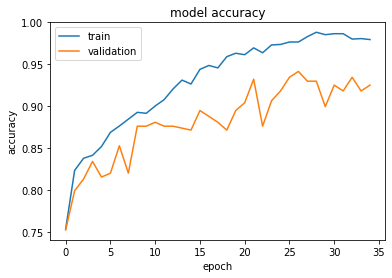

In [95]:
history = run_binary_cnn(train_it_cnn, valid_it, 35, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Exercise 8
Run several experiments trying to improve the model accuracy by tuning hyperparameters changing the model structure (using the deepness parameter or tuning further if you like), and using data augmentation.  Your goal should be to beat your best MLP model by as much as possible.  You should be reading the training results to identify overfitting and tune your model and training accordingly.  Ask the instructor for help if you need guidance.  

Capture at least 5 of your best experiments in the table in the Results section below.  You should capture enough information about each experiment to make it possible to re-create your results.  Write a few statements about what you learned through this exercise.  

*All tests are run, but to avoid a longggg pdf I will only include the accuracy results for the test*

**Starting accuracy:**

Training: 93.78

Testing: 92.54

### Image Augmentation

#### Rotation ( .01 -> .1)

Training: 93.78

Testing: 92.54

#### Horizontal flip (False->True)

Training: 91.51

Testing: 90.91

#### Vertical flip (False -> True)

Training: 91.04

Testing: 88.11

### Perameter Augmentation

##### Epochs(10 -> 35)

Training: 99.88

Testing: 93.94

#### Deepness (2 -> 1)

Training: 95.29

Testing: 87.88

### Activation Augmentation

#### Relu -> Sigmoid

Training: 57.36

Testing: 57.34

#### Relu -> tanh

Training: 87.09 

Testing: 86.01

### Model Augmentation

#### Add Dropout layer (.2)

Training: 91.39

Testing: 88.11

#### Add Dense Layer

Training: 93.78

Testing: 90.44
___

Now that we know how individual changes effect the accuracy, lets combine a couple that improved some aspect of accuracy.

#### 35 Epochs & Add dropout layer (.2)

Training: 98.84

Testing: 92.07

Very close... Lets try to increase dropout rate to .4:

Training: 99.71

Testing: 93.47

Increase dropout rate to .6:

Training: 97.96

Testing: 92.54

#### Deepness 1 & Dropout layer

Training: 93.95 

Testing: 89.51

#### Deepness 1 & Dropout layer & 35 Epochs

Training: 98.95

Testing: 90.21

### Results and Reflection
Looking at our last 3 experiemnts with combined changes, the only one to actually increase valdation accuracy was to increase the number of epochs to 35 and add a dropout layer with a rate of .4. This increased the accuracy by ~1%. By just increasing the epochs, we can increase the training accuracy but overfitting occurs. So, to counteract the overfitting by adding a dropout layer. A rate of .2 was not enough to fix the overfitting, so increasing the rate to .4 results in a 1% increase in validation accuracy. Thus, the most accurate model for this data set has a dropout rate of .4 and 35 epochs. However, increasing the number of epochs may increase the accuracy, but for the sake of time we will max out at 35.